# Exploration of GEFCom Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from gefcom import open_gefcom, get_split_dataset
from datetime import datetime
import seaborn as sns


In [2]:
df = pd.read_csv("GEFCom2014Data/Wind/Task 1/Task1_W_Zone1_10/Task1_W_Zone1.csv")

In [42]:
df_benchmark = pd.read_csv("GEFCom2014Data/Wind/Task 1/benchmark1_W.csv")

In [43]:
df_benchmark.head()

,ZONEID,TIMESTAMP,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,20121001 1:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.806268,0.834625,0.856123,0.881731,0.904285,0.921647,0.941265,0.956865,0.968518,0.984776
1,1,20121001 2:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.806268,0.834625,0.856123,0.881731,0.904285,0.921647,0.941265,0.956865,0.968518,0.984776
2,1,20121001 3:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.806268,0.834625,0.856123,0.881731,0.904285,0.921647,0.941265,0.956865,0.968518,0.984776
3,1,20121001 4:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.806268,0.834625,0.856123,0.881731,0.904285,0.921647,0.941265,0.956865,0.968518,0.984776
4,1,20121001 5:00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.806268,0.834625,0.856123,0.881731,0.904285,0.921647,0.941265,0.956865,0.968518,0.984776


In [45]:
df_exp = pd.read_csv("GEFCom2014Data/Wind/Task 1/TaskExpVars1_W_Zone1_10/TaskExpVars1_W_Zone1.csv")

In [46]:
df_exp.head()

,ZONEID,TIMESTAMP,U10,V10,U100,V100
0,1,20121001 1:00,2.685077,2.108842,3.617074,2.946774
1,1,20121001 2:00,2.720263,2.144330,3.667427,3.011907
2,1,20121001 3:00,2.709823,2.352066,3.692604,3.288446
3,1,20121001 4:00,2.502959,2.694397,3.450405,3.752104
4,1,20121001 5:00,2.245056,2.783550,3.123110,3.900033


In [48]:
df_exp.tail()

,ZONEID,TIMESTAMP,U10,V10,U100,V100
739,1,20121031 20:00,5.463209,1.808990,8.749232,2.982886
740,1,20121031 21:00,4.937119,5.748439,6.998881,9.229894
741,1,20121031 22:00,2.952588,5.714397,4.664477,10.310743
742,1,20121031 23:00,3.199071,6.480605,4.923922,10.263778
743,1,20121101 0:00,3.948263,7.419641,5.591239,10.533827


In [132]:
df

,Unnamed: 0,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100
0,0,1,20120101 1:00,0.000000,2.124600,-2.681966,2.864280,-3.666076
1,1,1,20120101 2:00,0.054879,2.521695,-1.796960,3.344859,-2.464761
2,2,1,20120101 3:00,0.110234,2.672210,-0.822516,3.508448,-1.214093
3,3,1,20120101 4:00,0.165116,2.457504,-0.143642,3.215233,-0.355546
4,4,1,20120101 5:00,0.156940,2.245898,0.389576,2.957678,0.332701
...,...,...,...,...,...,...,...,...
167995,16795,10,20131130 20:00,0.979423,-4.183206,-6.842448,-6.388334,-11.709072
167996,16796,10,20131130 21:00,0.963973,-3.562286,-7.171588,-5.460941,-11.727143
167997,16797,10,20131130 22:00,0.863916,-1.023359,-4.501787,-1.512555,-6.466394
167998,16798,10,20131130 23:00,0.130676,1.997971,-2.958096,2.536932,-3.947353


In [5]:
dico = {}

for zone in range(1,11):
    df = pd.DataFrame()
    for i in range(1,16):
        # print(i)
        df = pd.concat([df, pd.read_csv(f"GEFCom2014Data/Wind/Task {i}/Task{i}_W_Zone1_10/Task{i}_W_Zone{zone}.csv")], ignore_index=True)
        # print(df.iloc[-1])
        # print()
    

    df = df.drop_duplicates(subset=["TIMESTAMP"], keep='first', ignore_index=True)
    print(zone, df["TARGETVAR"].isnull().sum().sum())

    dico[zone] = df.copy()

# COncatenation of the zones
df = pd.concat([dico[i] for i in range(1,11)])
df.fillna(method="ffill", inplace=True)
print(df.isnull().sum().sum())

df.to_csv("GEFCom2014Data/Wind/concat.csv")

1 11
2 13
3 88
4 0
5 0
6 0
7 0
8 0
9 0
10 0
0


In [4]:
print(df.isnull().sum().sum())


112


In [156]:
for zone in range(1,11):
    for i in range(1,16):
        df = pd.read_csv(f"GEFCom2014Data/Wind/Task {i}/Task{i}_W_Zone1_10/Task{i}_W_Zone{zone}.csv")
        if df.isnull().values.any():
            print("zone", zone, "i", i, df.isnull().sum().sum())

zone 1 i 8 1
zone 1 i 9 3
zone 1 i 10 6
zone 1 i 11 7
zone 1 i 12 8
zone 1 i 13 9
zone 1 i 14 10
zone 1 i 15 11
zone 2 i 8 1
zone 2 i 9 6
zone 2 i 10 6
zone 2 i 11 8
zone 2 i 12 8
zone 2 i 13 9
zone 2 i 14 10
zone 2 i 15 13
zone 3 i 11 16
zone 3 i 12 40
zone 3 i 13 87
zone 3 i 14 87
zone 3 i 15 88


In [138]:
df['TARGETVAR'].isnull().sum().sum()

112

In [139]:
112/16

7.0

# Prophet Test

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = open_gefcom()

In [7]:
train_set, valid_set, test_set = get_split_dataset(df=df)

df = train_set.loc[train_set["ZONEID"] == 1]

df

,Unnamed: 0,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100
0,0,1,20120101 1:00,0.000000,2.124600,-2.681966,2.864280,-3.666076
1,1,1,20120101 2:00,0.054879,2.521695,-1.796960,3.344859,-2.464761
2,2,1,20120101 3:00,0.110234,2.672210,-0.822516,3.508448,-1.214093
3,3,1,20120101 4:00,0.165116,2.457504,-0.143642,3.215233,-0.355546
4,4,1,20120101 5:00,0.156940,2.245898,0.389576,2.957678,0.332701
...,...,...,...,...,...,...,...,...
13866,13866,1,20130731 19:00,0.255051,-0.224958,-2.059098,0.484405,-5.552979
13867,13867,1,20130731 20:00,0.313222,-0.171416,-2.124746,0.894697,-5.603818
13868,13868,1,20130731 21:00,0.473828,0.095843,-2.299153,1.188554,-6.129971
13869,13869,1,20130731 22:00,0.296762,0.314960,-2.438287,1.326058,-6.496869


In [57]:
df.TIMESTAMP

0         20120101 1:00
1         20120101 2:00
2         20120101 3:00
3         20120101 4:00
4         20120101 5:00
              ...      
13866    20130731 19:00
13867    20130731 20:00
13868    20130731 21:00
13869    20130731 22:00
13870    20130731 23:00
Name: TIMESTAMP, Length: 13871, dtype: object

In [8]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':df.TIMESTAMP,'y':df.TARGETVAR})
ts.head()

,ds,y
0,20120101 1:00,0.000000
1,20120101 2:00,0.054879
2,20120101 3:00,0.110234
3,20120101 4:00,0.165116
4,20120101 5:00,0.156940


In [9]:
len(valid_set)

14640

In [10]:
from fbprophet import Prophet

# instantiate the model and fit the timeseries
prophet = Prophet(weekly_seasonality=True, changepoint_range=1,changepoint_prior_scale=0.75, yearly_seasonality=False)
prophet.fit(ts)

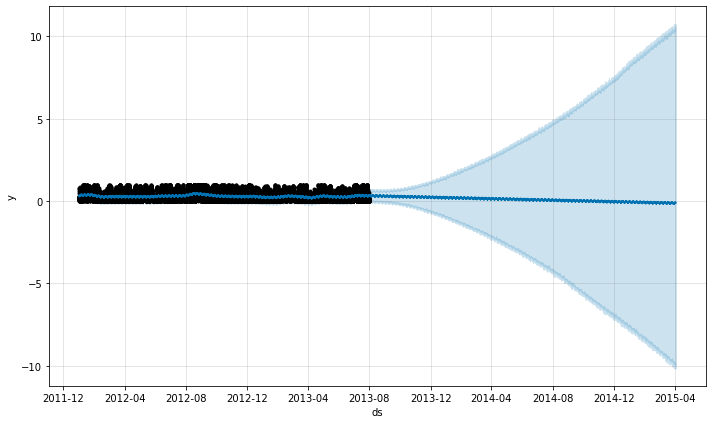

In [11]:
# create a future data frame 
# Periods = 24 is ok but not the entire validation set
periods = len(valid_set) # 24
future = prophet.make_future_dataframe(periods=periods, freq='H')
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)

In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)


In [79]:
ts

,ds,y
0,20120101 1:00,0.000000
1,20120101 2:00,0.054879
2,20120101 3:00,0.110234
3,20120101 4:00,0.165116
4,20120101 5:00,0.156940
...,...,...
13866,20130731 19:00,0.255051
13867,20130731 20:00,0.313222
13868,20130731 21:00,0.473828
13869,20130731 22:00,0.296762


In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01 01:00:00,0.343703,-0.012739,0.662094,0.343703,0.343703,-0.017802,-0.017802,-0.017802,-0.003425,-0.003425,-0.003425,-0.014378,-0.014378,-0.014378,0.0,0.0,0.0,0.325901
1,2012-01-01 02:00:00,0.343744,-0.017464,0.693002,0.343744,0.343744,-0.010569,-0.010569,-0.010569,0.005377,0.005377,0.005377,-0.015946,-0.015946,-0.015946,0.0,0.0,0.0,0.333175
2,2012-01-01 03:00:00,0.343784,0.000303,0.680440,0.343784,0.343784,0.002738,0.002738,0.002738,0.020383,0.020383,0.020383,-0.017646,-0.017646,-0.017646,0.0,0.0,0.0,0.346522
3,2012-01-01 04:00:00,0.343824,0.001703,0.711231,0.343824,0.343824,0.016954,0.016954,0.016954,0.036420,0.036420,0.036420,-0.019466,-0.019466,-0.019466,0.0,0.0,0.0,0.360778
4,2012-01-01 05:00:00,0.343865,0.020551,0.724947,0.343865,0.343865,0.024186,0.024186,0.024186,0.045581,0.045581,0.045581,-0.021395,-0.021395,-0.021395,0.0,0.0,0.0,0.368050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28506,2053-08-26 23:00:00,-3.589088,-1138.046112,1208.271183,-1138.087805,1208.362186,0.012090,0.012090,0.012090,-0.005740,-0.005740,-0.005740,0.017830,0.017830,0.017830,0.0,0.0,0.0,-3.576998
28507,2053-08-27 23:00:00,-3.589355,-1138.480299,1208.244042,-1138.234997,1208.523325,0.018483,0.018483,0.018483,-0.005740,-0.005740,-0.005740,0.024224,0.024224,0.024224,0.0,0.0,0.0,-3.570871
28508,2053-08-28 23:00:00,-3.589621,-1138.353271,1208.423332,-1138.382188,1208.684464,0.028511,0.028511,0.028511,-0.005740,-0.005740,-0.005740,0.034251,0.034251,0.034251,0.0,0.0,0.0,-3.561111
28509,2053-08-29 23:00:00,-3.589888,-1138.051175,1208.308196,-1138.529379,1208.820302,-0.012094,-0.012094,-0.012094,-0.005740,-0.005740,-0.005740,-0.006354,-0.006354,-0.006354,0.0,0.0,0.0,-3.601983


In [73]:
len(future) - len(df)

14640

In [65]:
# forecast[-(len(future) - len(df)):]

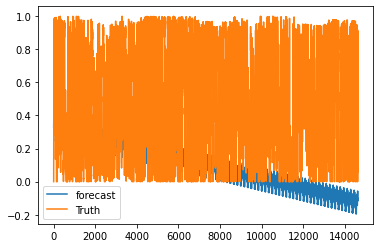

In [12]:
x = np.arange(0,periods)
plt.plot(x, forecast["yhat"][-periods:], label="forecast")
plt.plot(x, valid_set["TARGETVAR"][:periods], label="Truth")
plt.legend()

In [15]:
loss = torch.nn.MSELoss()
print(forecast["yhat"][-periods:].shape)
print(valid_set["TARGETVAR"][:periods].shape)
pred = torch.Tensor(forecast["yhat"][-periods:].values)
truth = torch.Tensor(valid_set["TARGETVAR"][:periods].values)
print(pred.shape)
print(truth.shape)
loss(pred, truth)

(14640,)
(14640,)
torch.Size([14640])
torch.Size([14640])


tensor(0.2944)

In [112]:
torch.sum(pred)
torch.sum(truth[:10])

tensor(2.5999)

In [124]:
np.min(truth.tolist())

nan

In [125]:
for i in range(truth.shape[0]):
    if truth[i] == "nan":
        print(i)
    # print(truth[i])

In [130]:
np.sqrt(np.nansum((truth - pred)**2))

51.763756

In [14]:
import torch

In [40]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01 01:00:00,0.000358,-0.122473,0.116877,0.000358,0.000358,0.002828,0.002828,0.002828,0.002828,0.002828,0.002828,0.0,0.0,0.0,0.003186
1,2012-01-01 02:00:00,0.000358,-0.112782,0.123839,0.000358,0.000358,0.008897,0.008897,0.008897,0.008897,0.008897,0.008897,0.0,0.0,0.0,0.009255
2,2012-01-01 03:00:00,0.000358,-0.109693,0.132584,0.000358,0.000358,0.014865,0.014865,0.014865,0.014865,0.014865,0.014865,0.0,0.0,0.0,0.015222
3,2012-01-01 04:00:00,0.000357,-0.102739,0.144539,0.000357,0.000357,0.015756,0.015756,0.015756,0.015756,0.015756,0.015756,0.0,0.0,0.0,0.016114
4,2012-01-01 05:00:00,0.000357,-0.115563,0.127296,0.000357,0.000357,0.008966,0.008966,0.008966,0.008966,0.008966,0.008966,0.0,0.0,0.0,0.009323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13891,2013-08-21 23:00:00,-0.000707,-0.127720,0.112005,-0.000724,-0.000687,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,0.0,0.0,0.0,-0.000776
13892,2013-08-22 23:00:00,-0.000727,-0.130189,0.111036,-0.000746,-0.000705,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,0.0,0.0,0.0,-0.000796
13893,2013-08-23 23:00:00,-0.000746,-0.130431,0.111737,-0.000767,-0.000723,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,0.0,0.0,0.0,-0.000815
13894,2013-08-24 23:00:00,-0.000766,-0.122117,0.121298,-0.000788,-0.000741,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,-0.000069,0.0,0.0,0.0,-0.000835


# Exploratory Data Analysis

# Luc Demortier
See https://github.com/LucDemortier/WindTurbineOutputPrediction/blob/master/2_exploratory_visuals.ipynb

All the plots below are coming from Demortier Luc notebook.

I adapted his notebook to my pandas dataframe and remove old methods.

In [19]:
df = open_gefcom()
train_set, valid_set, test_set = get_split_dataset(df)
df = train_set

In [23]:
def f(date):
    ymd = date[:4] + "-" + date[4:6] + "-" + date[6:8] + " "
    if len(date) == 13:
        h = "0" + date[-4:]
        return ymd + h
    else:
        return ymd + date[-5:]
        
df["ISO"] = df["TIMESTAMP"].apply(f)
df["ISO"] = df["ISO"].apply(datetime.fromisoformat)
df["YEAR"]      = df["ISO"].map(lambda x: x.year)
df["DAYOFYEAR"] = df["ISO"].map(lambda x: x.timetuple().tm_yday)
df["HOUR"]      = df["ISO"].map(lambda x: x.hour)


In [27]:
df.head()

,Unnamed: 0,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ISO,YEAR,DAYOFYEAR,HOUR
0,0,1,20120101 1:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,2012-01-01 01:00:00,2012,1,1
1,1,1,20120101 2:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2012-01-01 02:00:00,2012,1,2
2,2,1,20120101 3:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2012-01-01 03:00:00,2012,1,3
3,3,1,20120101 4:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2012-01-01 04:00:00,2012,1,4
4,4,1,20120101 5:00,0.156940,2.245898,0.389576,2.957678,0.332701,2012-01-01 05:00:00,2012,1,5



Rates of zero turbine output: 
{1: 1381, 2: 336, 3: 884, 4: 628, 5: 1107, 6: 1110, 7: 1222, 8: 1562, 9: 2361, 10: 1140}

Number of turbine output measurements equal to 0:       11731
Number of turbine output measurements equal to 1:           7
Number of turbine output measurements between 0 and 1: 126941
Total number of turbine output measurements:           1387100


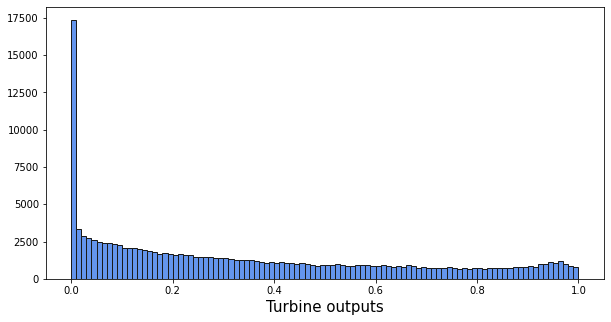

In [28]:
nturbines = 10
zeroes    = {i: len(df.loc[(df['TARGETVAR']==0) & (df["ZONEID"] == i)]) for i in range(1,nturbines+1)}
inbetween = {i: len(df.loc[(df['TARGETVAR']>0) & (df['TARGETVAR']<1) & (df["ZONEID"] == i)])  for i in range(1,nturbines+1)}
ones      = {i: len(df[(df['TARGETVAR']==1) & (df["ZONEID"] == i)]) for i in range(1,nturbines+1)}
print('\nRates of zero turbine output: \n{0}\n'.format(zeroes))
print('Number of turbine output measurements equal to 0:      {0:6d}'.format(sum(zeroes.values())))
print('Number of turbine output measurements equal to 1:      {0:6d}'.format(sum(ones.values())))
print('Number of turbine output measurements between 0 and 1: {0:6d}'.format(sum(inbetween.values())))
print('Total number of turbine output measurements:           {0:6d}'.format(nturbines*len(df)))

# Plot histogram of turbine output, summed over all turbines
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )
targets = []
for turbine in range(1,nturbines+1):
    targets.extend(df[df["ZONEID"]==turbine]['TARGETVAR'].tolist())
axes.hist(targets, bins=100, range=None, histtype='bar', align='mid', 
          orientation='vertical', log=False, color='cornflowerblue', edgecolor='k', label=None)
axes.set_xlabel("Turbine outputs", fontsize=15)
plt.show()
fig.savefig('Images/wind_turbine_outputs.pdf', dpi=200, bbox_inches='tight')

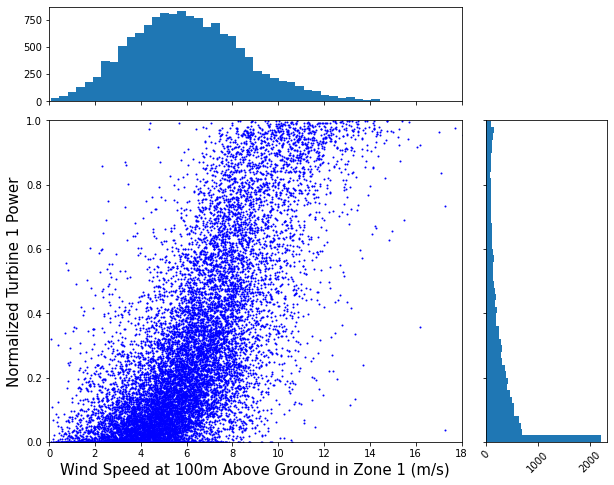

In [29]:
'''
Plot empirical power curve of one of the turbines.
Here we pick turbine 1 power versus wind speed at 100 m in zone 7.
'''

from matplotlib.gridspec import GridSpec

i=j=1

df["H100"] = np.sqrt(df["V100"]**2 + df["U100"]**2)
df["H10"] = np.sqrt(df["V10"]**2 + df["U10"]**2)

tpower  = df.loc[df["ZONEID"] == i]["TARGETVAR"].tolist()
wspeed  = df.loc[df["ZONEID"] == j]["H100"].tolist() # df[('H100', 7)].tolist()

fig = plt.figure(figsize=(10,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(wspeed, tpower, s=1, color="blue")
ax_marg_x.hist(wspeed, bins=50)
ax_marg_y.hist(tpower, bins=50, orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels and limits on joint
ax_joint.set_xlabel(f'Wind Speed at 100m Above Ground in Zone {i} (m/s)', fontsize=15)
ax_joint.set_ylabel(f'Normalized Turbine {j} Power', fontsize=15)
ax_joint.set_xlim([0.0, 18.0])
ax_joint.set_ylim([0.0, 1.0])

# Set labels and limits on marginals
ax_marg_y.set_xlabel('')
ax_marg_x.set_ylabel('')
ax_marg_x.set_xlim([0.0,18.0])
ax_marg_y.set_ylim([0.0,1.0])
for tick in ax_marg_y.get_xticklabels():
    tick.set_rotation(45)

plt.show()
fig.savefig(f'Images/EmpiricalPowerCurve{i}_{j}.pdf', dpi=200, bbox_inches='tight')

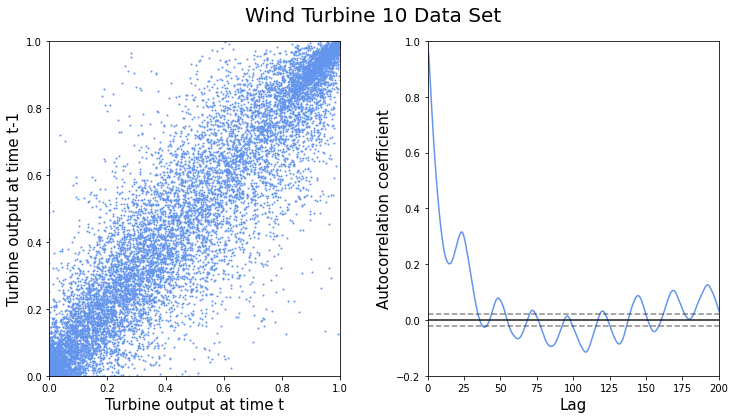

In [30]:
'''
Examine autocorrelation of turbine output.
See https://en.wikipedia.org/wiki/Correlogram
'''

turbine = 10

fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(12,6) )
plt.subplots_adjust( wspace=0.30, hspace=0.20, top=0.90 )
plt.suptitle("Wind Turbine "+str(turbine)+" Data Set", fontsize=20)

series0 = df.loc[df["ZONEID"] == turbine]["TARGETVAR"]
axes[0].scatter(series0, series0.shift(periods=1), color="cornflowerblue", alpha=1.0, s=1)
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.0])
axes[0].set_xlabel("Turbine output at time t", fontsize=15)
axes[0].set_ylabel("Turbine output at time t-1", fontsize=15)

nmax = len(series0)
lags = range(0, nmax)
ci95 = 1.96/np.sqrt(float(nmax))
ci99 = 2.58/np.sqrt(float(nmax))
data = np.asarray(series0[:nmax])
c0   = np.var(data, ddof=0)
a1   = np.mean(data)
correlations = [((data[:nmax-k]-a1)*(data[k:]-a1)).sum()/float(nmax)/c0 for k in lags]
axes[1].plot(lags, correlations, color="cornflowerblue")
axes[1].hlines(y=0.0, xmin=0.0, xmax=200.0, color='k')
#axes[1].hlines(y=ci95,  xmin=0.0, xmax=200.0, color='k', alpha=0.5)
#axes[1].hlines(y=-ci95, xmin=0.0, xmax=200.0, color='k', alpha=0.5)
axes[1].hlines(y=ci99,  xmin=0.0, xmax=200.0, colors='k', linestyles='dashed', alpha=0.5)
axes[1].hlines(y=-ci99, xmin=0.0, xmax=200.0, colors='k', linestyles='dashed', alpha=0.5)
axes[1].set_xlim([0.0, 200.0])
axes[1].set_ylim([-0.20, +1.0])
axes[1].set_xlabel("Lag", fontsize=15)
axes[1].set_ylabel("Autocorrelation coefficient", fontsize=15)

plt.show()
fig.savefig('Images/autocorrelations.pdf', dpi=200, bbox_inches='tight')

1
2
3
4
5


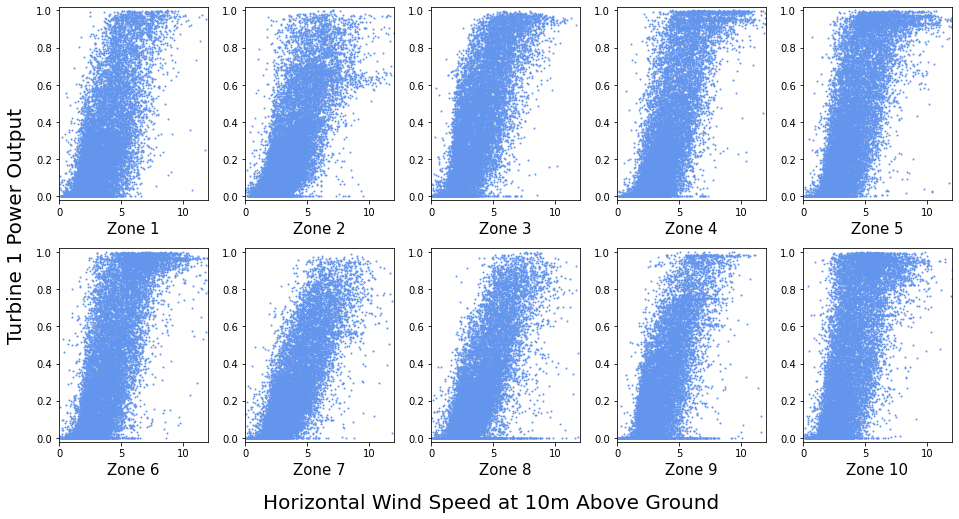

In [31]:
turbine = 1

fig, axes = plt.subplots( nrows=2, ncols=5, figsize=(16,8) )
plt.subplots_adjust( wspace=0.25, hspace=0.25)
xmax   = 12.0

for ind,tnum in enumerate([1,2,3,4,5]):
    print(tnum)
    axes[0,ind].scatter(df.loc[df["ZONEID"]==tnum]['H10'], df.loc[df["ZONEID"]==tnum]['TARGETVAR'], s=1, color="cornflowerblue")
    axes[0,ind].set_xlabel('Zone '+str(tnum), fontsize=15)
    axes[0,ind].set_xlim(0.0, xmax)
    axes[0,ind].set_ylim(-0.02, 1.02)
for ind,tnum in enumerate([6,7,8,9,10]):
    axes[1,ind].scatter(df.loc[df["ZONEID"]==tnum]['H10'], df.loc[df["ZONEID"]==tnum]['TARGETVAR'], s=1, color="cornflowerblue")
    axes[1,ind].set_xlabel('Zone '+str(tnum), fontsize=15)
    axes[1,ind].set_xlim(0.0, xmax)
    axes[1,ind].set_ylim(-0.02, 1.02)
    
fig.text(0.08, 0.5, 'Turbine '+str(turbine)+' Power Output', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.01, 'Horizontal Wind Speed at 10m Above Ground', ha='center', fontsize=20)

plt.show()
fig.savefig('Images/power_vs_windspeed.pdf', dpi=200, bbox_inches='tight')

Maximum relative power = 0.998308430262274, maximum wind speed = 10.2959678639339


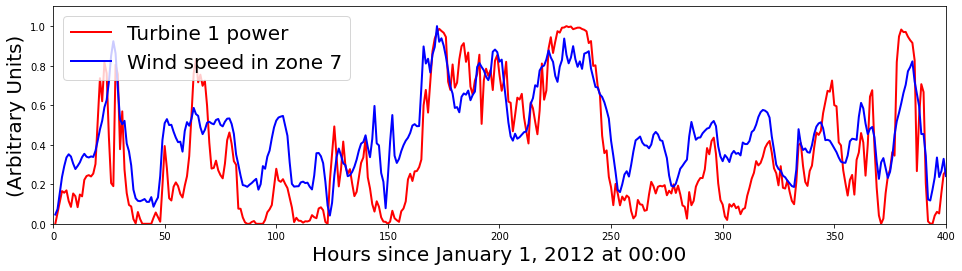

In [32]:
'''
Plot turbine output and wind speed as a function of time.
'''
tpower = 1
twind  = 7
npts   = 400

def make_time_stamp(row):
    return ((row['YEAR']-2012)*366 + (row['DAYOFYEAR']-1))*24 + row['HOUR']

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(16,4))
xval = df.loc[df["ZONEID"]==tpower].iloc[:npts,:].apply(make_time_stamp, axis=1)
yval = df.loc[df["ZONEID"]==tpower]["TARGETVAR"][:npts]
yvalmax = max(yval)
yval = yval/yvalmax
zval = df.loc[df["ZONEID"]==twind]["H10"][:npts] # df.loc[:npts-1,('H10', twind)]
zvalmax = max(zval)
zval = zval/zvalmax
print('Maximum relative power = {0}, maximum wind speed = {1}'.format(yvalmax, zvalmax))

axis.plot(xval, yval, color="red", linewidth=2.0, label="Turbine "+str(tpower)+" power")
axis.plot(xval, zval, color="blue", linewidth=2.0, label="Wind speed in zone "+str(twind))
axis.set_xlim([0., npts])
axis.set_ylim([0., 1.1])
axis.set_xlabel("Hours since January 1, 2012 at 00:00", fontsize=20)
axis.set_ylabel("(Arbitrary Units)", fontsize=20)
axis.legend(prop={'size': 20},loc="upper left")

plt.show()
fig.savefig('Images/power_wind_vs_time.pdf', dpi=200, bbox_inches='tight')


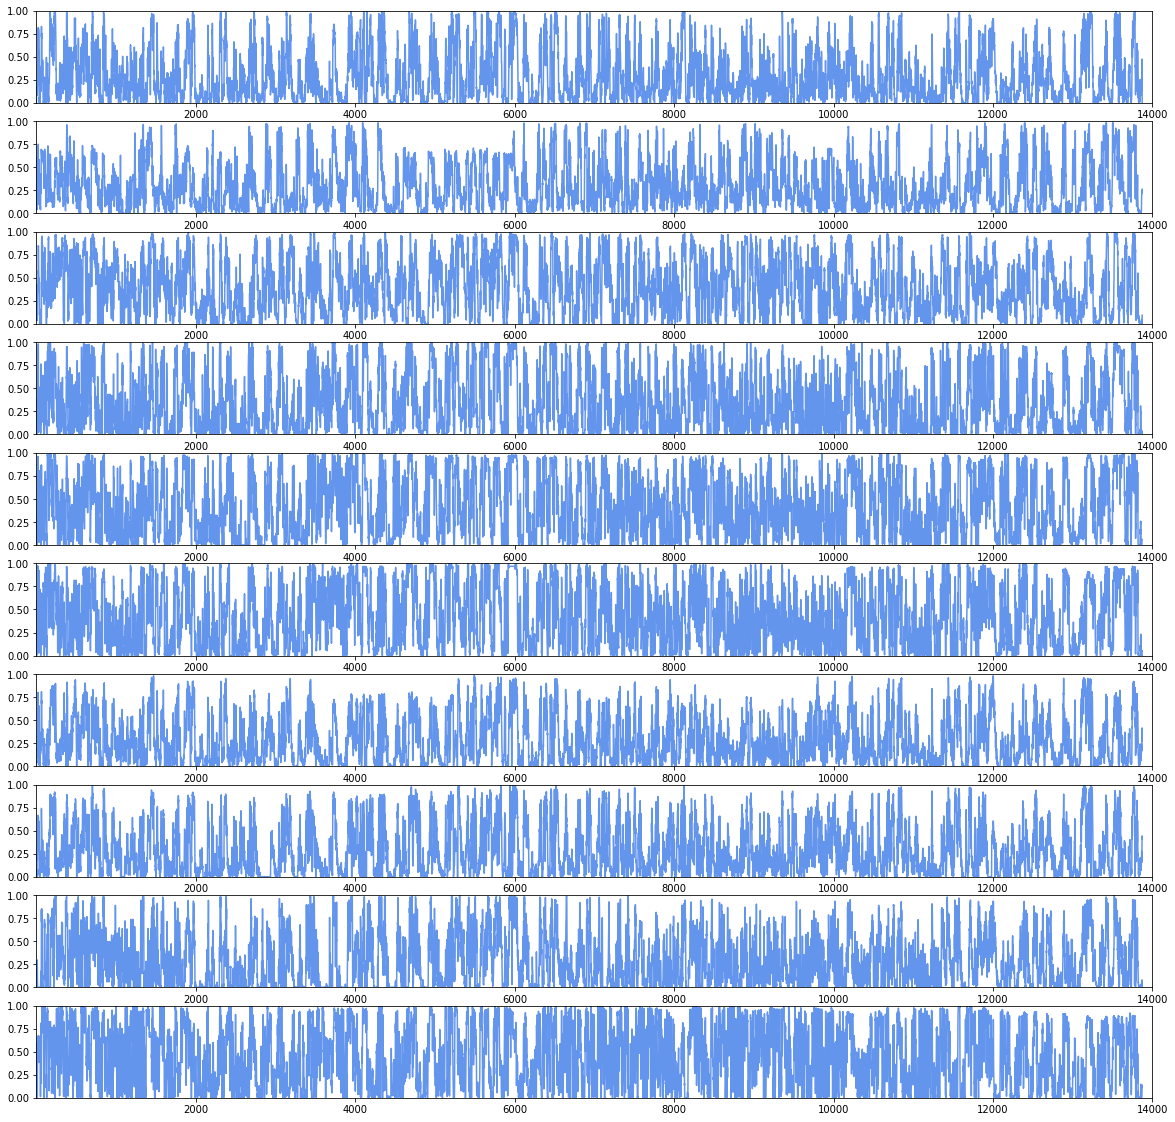

In [33]:
'''
Plot turbine outputs as a function of time.
'''
def make_time_stamp(row):
    return ((row['YEAR']-2012)*366 + (row['DAYOFYEAR']-1))*24 + row['HOUR']

fig, axes = plt.subplots( nrows=10, ncols=1, figsize=(20,20))
for turbine in range(1,nturbines+1):
    xval = df.loc[df["ZONEID"]==turbine].apply(make_time_stamp, axis=1 )
    yval = df.loc[df["ZONEID"]==turbine]["TARGETVAR"]
    axes[turbine-1].plot(xval, yval, color="cornflowerblue", alpha=1.0)
    axes[turbine-1].set_xlim([1., 14000.])
    axes[turbine-1].set_ylim([0., 1.])
axes[0].set_xlabel("Time", fontsize=15)

plt.show()


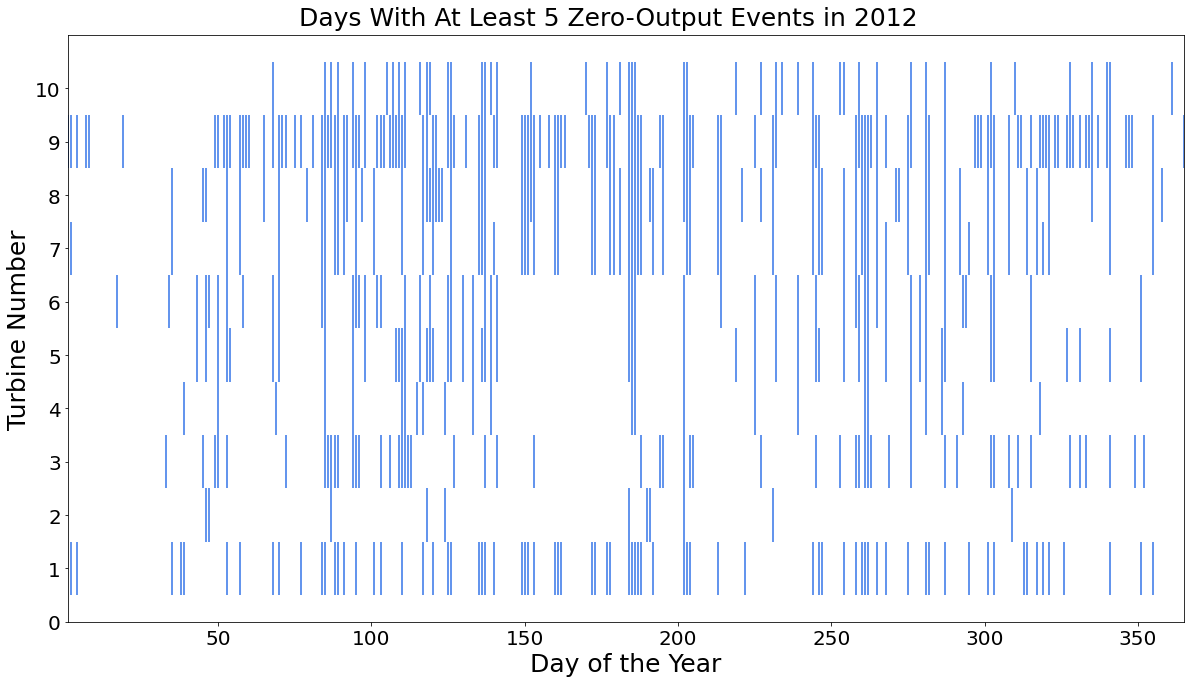

In [34]:
'''
Make a plot of zero-output events as a function of the day of the year.
Do zero-output events tend to correlate among turbines?
'''
nevents   = 5
year      = 2012

fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(20,10))
plt.subplots_adjust( top=0.94 )
plt.suptitle("Days With At Least "+str(nevents)+" Zero-Output Events"+" in "+str(year), fontsize=25)
for turbine in range(1,nturbines+1):
    zero_events = df['DAYOFYEAR'][(df['YEAR']==year) & (df['TARGETVAR']==0.0) & (df['ZONEID']==turbine) ].tolist()
    event_cnts  = {i: zero_events.count(i) for i in range(1,366)}
    xval        = [i for i in range(1,366) if event_cnts[i]>=nevents]
    yval        = [turbine]*len(xval)
    axes.errorbar(xval, yval, yerr=0.5, xerr=None, fmt="None", ecolor="cornflowerblue", elinewidth=2.0 )
axes.set_xlabel("Day of the Year", fontsize=25)
axes.set_ylabel("Turbine Number", fontsize=25)
axes.tick_params(axis='both', which='major', labelsize=20)
axes.set_xlim([1., 365.])
axes.set_ylim([0., nturbines+1])
plt.yticks(np.arange(0, 11, 1))
plt.show()


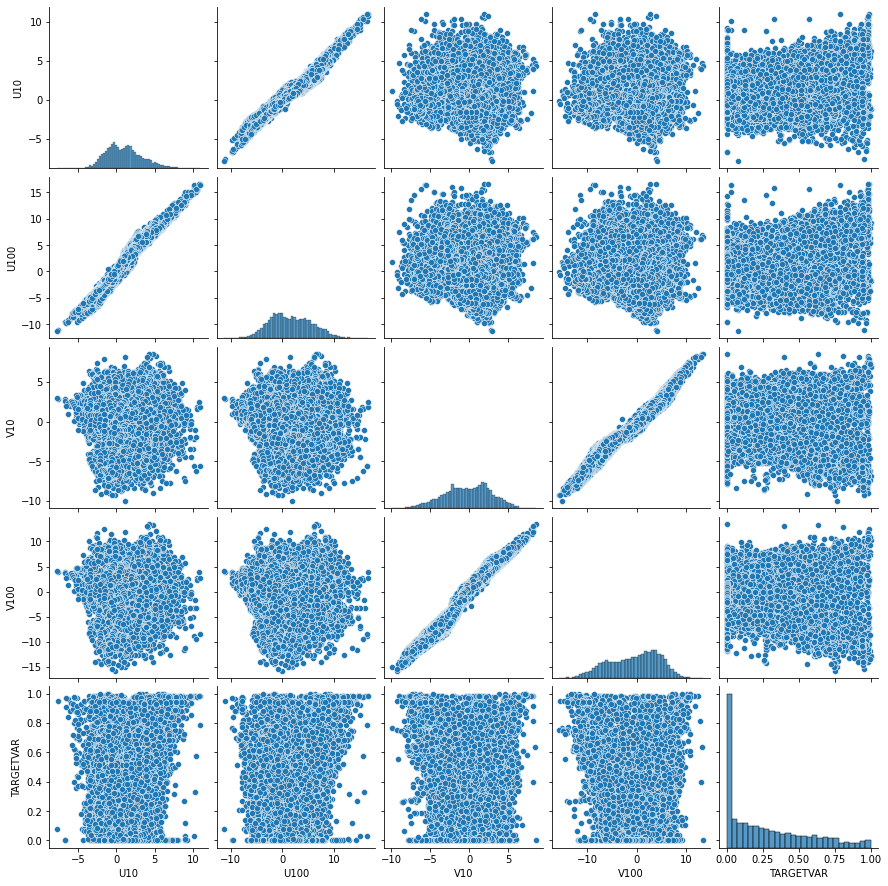

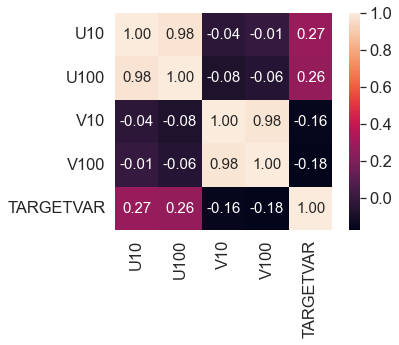

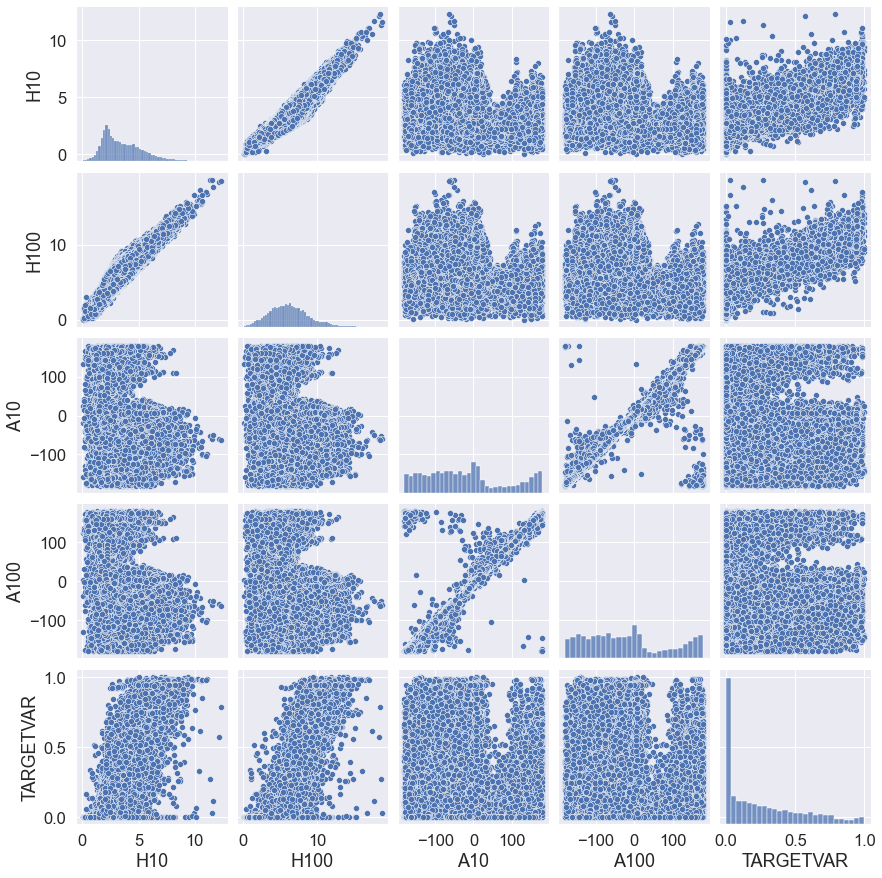

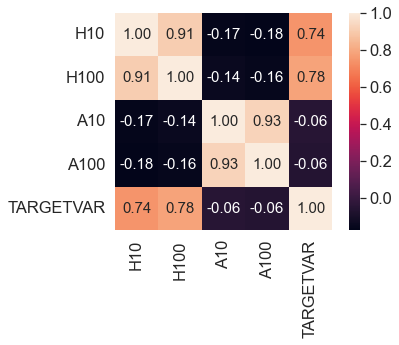

In [35]:
'''
Compute matrix of correlation plots between select features and target variable.
'''

# Scatter plot matrix for wind speed components
#sns.set(style='whitegrid', context='notebook')
turbine = 9
cols = [df.loc[df["ZONEID"]==turbine]["U10"], 
        df.loc[df["ZONEID"]==turbine]["U100"], 
        df.loc[df["ZONEID"]==turbine]["V10"], 
        df.loc[df["ZONEID"]==turbine]["V100"], 
        df.loc[df["ZONEID"]==turbine]["TARGETVAR"]]
turbine_df = pd.DataFrame(np.array(cols).T, columns=["U10", "U100", "V10", "V100", "TARGETVAR"])

sns.pairplot(turbine_df, height=2.5)
plt.show()

# Correlation matrix
cm = np.corrcoef(turbine_df.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=turbine_df.columns, xticklabels=turbine_df.columns)
plt.show()

# Scatter plot matrix for wind speed magnitudes and directions

df["A10"] = np.rad2deg(np.arctan2(-df["U10"], -df["V10"]))
df["A100"] = np.rad2deg(np.arctan2(-df["U100"], -df["V100"]))
cols = [df.loc[df["ZONEID"]==turbine]["H10"], 
        df.loc[df["ZONEID"]==turbine]["H100"], 
        df.loc[df["ZONEID"]==turbine]["A10"], 
        df.loc[df["ZONEID"]==turbine]["A100"], 
        df.loc[df["ZONEID"]==turbine]["TARGETVAR"]]

turbine_df = pd.DataFrame(np.array(cols).T, columns=["H10", "H100", "A10", "A100", "TARGETVAR"])

sns.pairplot(turbine_df, height=2.5)
plt.show()

# Correlation matrix
cm = np.corrcoef(turbine_df.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=turbine_df.columns, xticklabels=turbine_df.columns)
plt.show()

# Reset matplotlib style settings
sns.reset_orig()
import matplotlib.pyplot as plt
%matplotlib inline

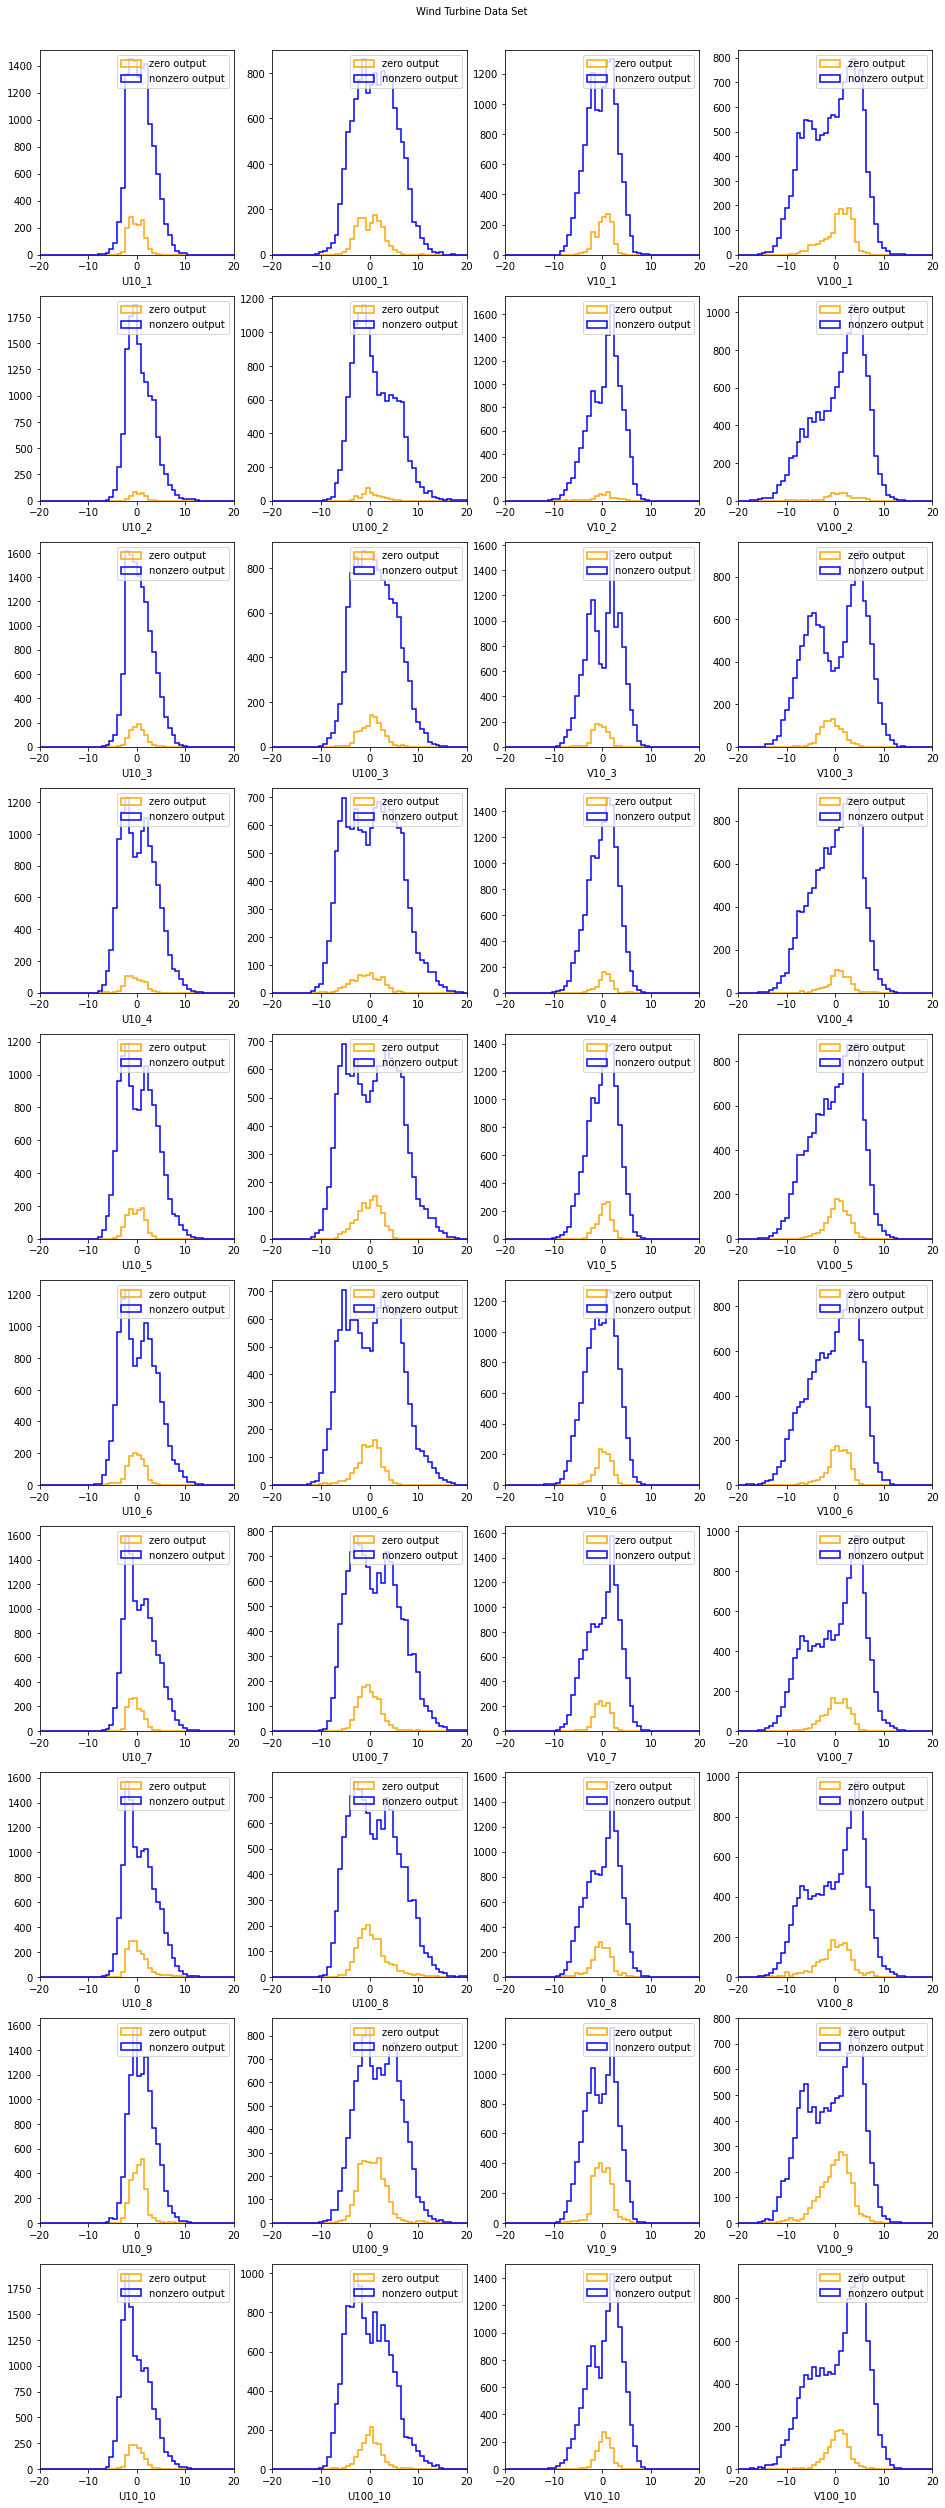

In [36]:
'''
The turbine outputs all have an unusually high spike at zero. Are these unpredictable
breakdown or maintenance events? Or do they correlate with weak winds? Let's see what
we can learn by making plots of feature distributions within the zero-output and 
nonzero-output subsamples.
'''

# Create separate data frames for zero and nonzero target variables
turbine     = 9
df_zero    = df.loc[(df['TARGETVAR']==0.0) ]
df_nonzero = df.loc[(df['TARGETVAR']>0.0) ]

fig, axes = plt.subplots( nrows=10, ncols=4, figsize=(16,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.965 )
plt.suptitle("Wind Turbine Data Set", fontsize=10)
Ycol = ["orange"]
Ncol = ["blue"]
hlw  = 1.5
for turb in range(1,nturbines+1):
    
    i = turb-1
    axes[i,0].hist(df_zero[df_zero["ZONEID"]==turb]['U10'], bins=50, range=[-20.,20.], align="mid",
                   color=Ycol, linewidth=hlw, histtype="step", label="zero output")
    axes[i,0].hist(df_nonzero[df_nonzero["ZONEID"]==turb]['U10'], bins=50, range=[-20.,20.], align="mid",
                   color=Ncol, linewidth=hlw, histtype="step", label="nonzero output")
    axes[i,0].set_xlabel("U10_"+str(turb))
    axes[i,0].set_xlim(-20., 20.)
    axes[i,0].get_xaxis().get_major_formatter().set_useOffset(False)
    axes[i,0].legend(prop={'size': 10},loc="upper right")

    axes[i,1].hist(df_zero[df_zero["ZONEID"]==turb]['U100'], bins=50, range=[-20.,20.], align="mid",
                   color=Ycol, linewidth=hlw, histtype="step", label="zero output")
    axes[i,1].hist(df_nonzero[df_nonzero["ZONEID"]==turb]['U100'], bins=50, range=[-20.,20.], align="mid",
                   color=Ncol, linewidth=hlw, histtype="step", label="nonzero output")
    axes[i,1].set_xlabel("U100_"+str(turb))
    axes[i,1].set_xlim(-20., 20.)
    axes[i,1].get_xaxis().get_major_formatter().set_useOffset(False)
    axes[i,1].legend(prop={'size': 10},loc="upper right")

    axes[i,2].hist(df_zero[df_zero["ZONEID"]==turb]['V10'], bins=50, range=[-20.,20.], align="mid",
                   color=Ycol, linewidth=hlw, histtype="step", label="zero output")
    axes[i,2].hist(df_nonzero[df_nonzero["ZONEID"]==turb]['V10'], bins=50, range=[-20.,20.], align="mid",
                   color=Ncol, linewidth=hlw, histtype="step", label="nonzero output")
    axes[i,2].set_xlabel("V10_"+str(turb))
    axes[i,2].set_xlim(-20., 20.)
    axes[i,2].get_xaxis().get_major_formatter().set_useOffset(False)
    axes[i,2].legend(prop={'size': 10},loc="upper right")

    axes[i,3].hist(df_zero[df_zero["ZONEID"]==turb]['V100'], bins=50, range=[-20.,20.], align="mid",
                   color=Ycol, linewidth=hlw, histtype="step", label="zero output")
    axes[i,3].hist(df_nonzero[df_nonzero["ZONEID"]==turb]['V100'], bins=50, range=[-20.,20.], align="mid",
                   color=Ncol, linewidth=hlw, histtype="step", label="nonzero output")
    axes[i,3].set_xlabel("V100_"+str(turb))
    axes[i,3].set_xlim(-20., 20.)
    axes[i,3].get_xaxis().get_major_formatter().set_useOffset(False)
    axes[i,3].legend(prop={'size': 10},loc="upper right")

plt.show()


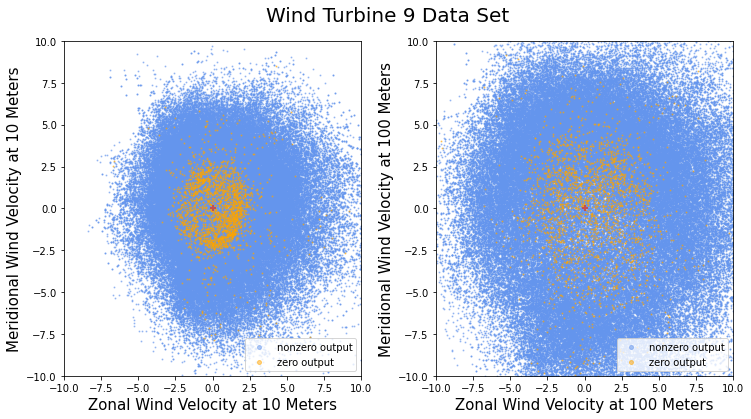

In [37]:
'''
Plot meridional versus zonal wind velocities, separating instances with zero and non-zero turbine output.
'''
turbine     = 9

zero_filter = (df["TARGETVAR"] == 0) & (df["ZONEID"] == turbine)
df_zero     = df[zero_filter]
df_nonzero  = df[~zero_filter]
df_nonzero

fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(12,6) )
plt.subplots_adjust( wspace=0.25, hspace=0.15, top=0.90 )
plt.suptitle("Wind Turbine "+str(turbine)+" Data Set", fontsize=20)
Ycol = ["orange"]
Ncol = ["cornflowerblue"]
alphas = 0.50

axes[0].scatter(df_nonzero['U10'], df_nonzero['V10'], color=Ncol, alpha=alphas, 
                  marker="o", label="nonzero output", s=1)
axes[0].scatter(df_zero['U10'], df_zero['V10'], color=Ycol, alpha=alphas, 
                  marker="o", label="zero output", s=1)
axes[0].plot(0.0, 0.0, "+r", markersize=6, markeredgewidth=2)
axes[0].set_xlim([-10.0, 10.0])
axes[0].set_ylim([-10.0, 10.0])
axes[0].set_xlabel("Zonal Wind Velocity at 10 Meters", fontsize=15)
axes[0].set_ylabel("Meridional Wind Velocity at 10 Meters", fontsize=15)
axes[0].legend(loc="lower right", fontsize=10, markerscale=4)

axes[1].scatter(df_nonzero['U100'], df_nonzero['V100'], color=Ncol, alpha=alphas, 
                  marker="o", label="nonzero output", s=1)
axes[1].scatter(df_zero['U100'], df_zero['V100'], color=Ycol, alpha=alphas, 
                  marker="o", label="zero output", s=1)
axes[1].plot(0.0, 0.0, "+r", markersize=6, markeredgewidth=2)
axes[1].set_xlim([-10.0, 10.0])
axes[1].set_ylim([-10.0, 10.0])
axes[1].set_xlabel("Zonal Wind Velocity at 100 Meters", fontsize=15)
axes[1].set_ylabel("Meridional Wind Velocity at 100 Meters", fontsize=15)
axes[1].legend(loc="lower right", fontsize=10, markerscale=4)

plt.show()
fig.savefig('Images/donut_plots.pdf', dpi=200, bbox_inches='tight')

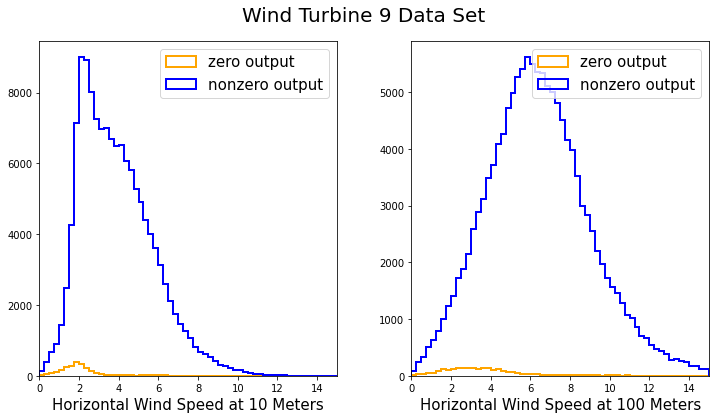

In [38]:
'''
Plot horizontal wind velocity distributions, separately for instances with zero and non-zero turbine output.
'''
turbine = 9

zero_filter = (df["TARGETVAR"] == 0) & (df["ZONEID"] == turbine)
df_zero     = df[zero_filter]
df_nonzero  = df[~zero_filter]

fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(12,6) )
plt.subplots_adjust( wspace=0.25, hspace=0.15, top=0.90 )
plt.suptitle("Wind Turbine "+str(turbine)+" Data Set", fontsize=20)
Ycol      = ["orange"]
Ncol      = ["blue"]
hlw       = 2.0
normalize = True
axes[0].hist(df_zero['H10'], bins=60, range=[0.,15.],
               align="mid", color=Ycol, linewidth=hlw, histtype="step", label="zero output")
axes[0].hist(df_nonzero['H10'], bins=60, range=[0.,15.],
               align="mid", color=Ncol, linewidth=hlw, histtype="step", label="nonzero output")
axes[0].set_xlabel("Horizontal Wind Speed at 10 Meters", fontsize=15)
axes[0].set_xlim(0., 15.)
axes[0].legend(prop={'size': 15}, loc="upper right")

axes[1].hist(df_zero['H100'], bins=60, range=[0.,15.],
               align="mid", color=Ycol, linewidth=hlw, histtype="step", label="zero output")
axes[1].hist(df_nonzero['H100'], bins=60, range=[0.,15.],
               align="mid", color=Ncol, linewidth=hlw, histtype="step", label="nonzero output")
axes[1].set_xlabel("Horizontal Wind Speed at 100 Meters", fontsize=15)
axes[1].set_xlim(0., 15.)
axes[1].legend(prop={'size': 15}, loc="upper right")

plt.show()



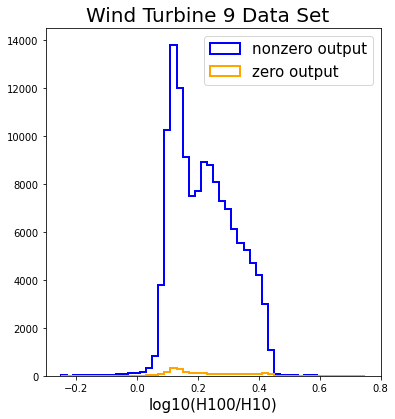

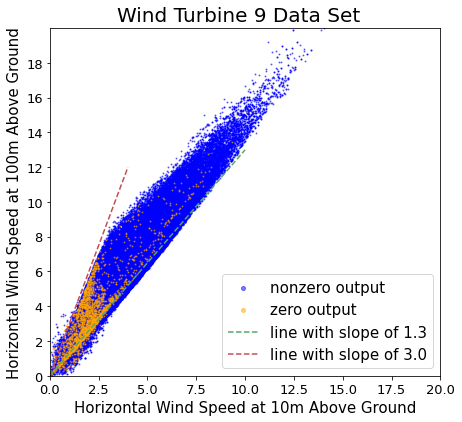

In [39]:
'''
Plot horizontal wind velocity distributions, separately for instances with zero and non-zero turbine output.
'''
turbine = 9

zero_filter = (df["TARGETVAR"] == 0) & (df["ZONEID"] == turbine)
df_zero     = df[zero_filter]
df_nonzero  = df[~zero_filter]

Ycol        = ["orange"]
Ncol        = ["blue"]
hlw         = 2.0
alphas      = 0.5

fig, ax     = plt.subplots( nrows=1, ncols=1, figsize=(6,6) )
plt.subplots_adjust( wspace=0.25, hspace=0.15, top=0.93 )
plt.suptitle("Wind Turbine "+str(turbine)+" Data Set", fontsize=20)

ax.hist(np.log10(df_nonzero['H100']/df_nonzero['H10']), bins=50, range=[-0.25,0.75], 
        color=Ncol, linewidth=hlw, histtype="step", align='mid', label="nonzero output")
ax.hist(np.log10(df_zero['H100']/df_zero['H10']), bins=50, range=[-0.25,0.75], 
        color=Ycol, linewidth=hlw, histtype="step", align='mid', label="zero output")
ax.set_xlabel("log10(H100/H10)", fontsize=15)
ax.legend(prop={'size': 15}, loc="upper right")
plt.show()

fig, ax     = plt.subplots( nrows=1, ncols=1, figsize=(7,6) )
plt.subplots_adjust( wspace=0.25, hspace=0.15, top=0.93 )
plt.suptitle("Wind Turbine "+str(turbine)+" Data Set", fontsize=20)
ax.scatter(df_nonzero['H10'], df_nonzero['H100'], 
           marker="o", color=Ncol, s=1, alpha=alphas, label="nonzero output")
ax.scatter(df_zero['H10'], df_zero['H100'], 
           marker="o", color=Ycol, s=1, alpha=alphas, label="zero output")
ax.set_xlim([0.0, 20.0])
ax.set_ylim([0.0, 20.0])
ax.set_xlabel("Horizontal Wind Speed at 10m Above Ground", fontsize=15)
ax.set_ylabel("Horizontal Wind Speed at 100m Above Ground", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.yticks(np.arange(0, 20, 2))
ax.plot([0.0,10.0], [0.0,13.0], 'g--', label="line with slope of 1.3")
ax.plot([0.0,4.0], [0.0,12.], 'r--', label="line with slope of 3.0")
ax.legend(prop={'size': 15}, loc="lower right", markerscale=4)
plt.show()
fig.savefig('Images/H100_vs_H10.pdf', dpi=200, bbox_inches='tight')

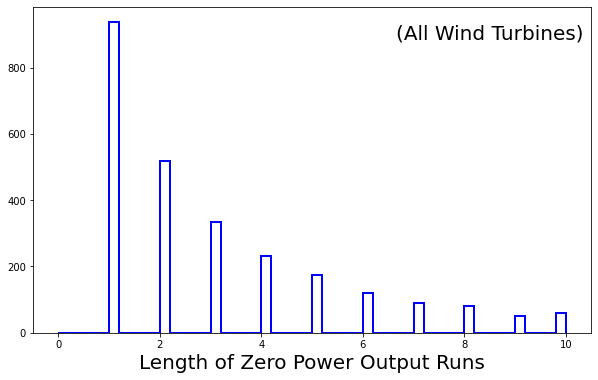

In [40]:
'''
Make a histogram of the length of zero power output runs for all turbines combined.
Examples:
    - If at time t zero power output is observed, but at times t-1 and t+1 the power output is 
      non-zero, then the run length is 1.
    - If at times t, t+1, t+2 and t+3 zero power output is observed, but at times t-1 and t+4
      the power output is non-zero, then the run length is 4.
'''
import datetime

dt_1hour  = datetime.timedelta(hours=1)
zero_runs = []
zr_ind    = -1

for turbine in range(1, nturbines+1):
    zero_runs.append(1)
    zr_ind     += 1
    zero_filter = (df["TARGETVAR"] == 0) & (df["ZONEID"] == turbine)
    df_zero     = df[zero_filter]
    obs_times   = [0]*len(df_zero)
    ot_ind      = 0
    
    # print(df_zero)
    for year, doy, hour in np.array(df_zero[['YEAR', 'DAYOFYEAR', 'HOUR']]):
        obs_times[ot_ind] = datetime.datetime(year, 1, 1) + datetime.timedelta(days=int(doy), hours=int(hour))
        ot_ind += 1

    time0  = obs_times[0]
    for time in obs_times[1:]:
        if time-time0 == dt_1hour:
            zero_runs[zr_ind] += 1
        else:
            zero_runs.append(1)
            zr_ind += 1
        time0 = time
    
fig, ax     = plt.subplots( nrows=1, ncols=1, figsize=(10,6) )
ax.hist(zero_runs, bins=50, range=[0,10], color="blue", linewidth=2.0, histtype="step", 
        align='mid')
ax.set_xlabel("Length of Zero Power Output Runs", fontsize=20)
ax.text(0.65, 0.90, '(All Wind Turbines)', transform=ax.transAxes, fontsize=20)
plt.show()
fig.savefig('Images/Zero_Output_Runs.pdf', dpi=200, bbox_inches='tight')